In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, recall_score, precision_score, f1_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
import pandas as pd
import glob
import os
import statistics
from pathlib import Path
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from keras.utils import np_utils
from keras.callbacks import Callback, EarlyStopping
from keras.metrics import AUC, Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from statistics import mean
from tensorflow_addons.metrics import F1Score
from tensorflow.keras import backend as K
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Preparazione Dataset

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df1 = pd.read_csv('/Users/andreaermellino/desktop/DSL.csv')

In [5]:
df1

,external_id,how_many_ok_urls,how_many_ko_urls,os_android,os_bsd,os_ios,os_linux,os_osx,os_other,os_windows,browser_android,browser_chrome,browser_chromium,browser_edge,browser_firefox,browser_ie,browser_opera,browser_other,browser_safari,browser_unknown,feriale_morning,feriale_afternoon,feriale_evening,feriale_night,weekend_morning,weekend_afternoon,weekend_evening,weekend_night,L00_50,L51_100,L101_250,L251_500,L501_1000,L1001_2500,L2501_5000,L5001_10000,L10001_more,categories_artandentertainment,categories_automotive,categories_business,categories_careers,categories_education,categories_emotions,categories_familyandparenting,categories_finance,categories_foodanddrink,categories_healthandfitness,categories_hobbiesandinterests,categories_homeandgarden,categories_intentions,categories_lawgovtandpolitics,categories_news,categories_pets,categories_realestate,categories_religionandspirituality,categories_science,categories_shopping,categories_society,categories_sports,categories_styleandfashion,categories_technologyandcomputing,categories_travel,categories_uncategorized,admants_appletv,admants_chili,admants_comparatoriprezzo,admants_disdettecontrattuali,admants_googleplayfilm,admants_mediaset,admants_netflix,admants_novita,admants_offerte,admants_skyarte,admants_skycinema,admants_skycompetitors,admants_skyfamiglia,admants_skygastronomia,admants_skyinternet,admants_skyinternetfamiglia,admants_skymusica,admants_skynews,admants_skyonline,admants_skysport,admants_skysportcalcio,admants_skysportformula1,admants_skytecnologia,admants_skytelevisione,CINEMA,CALCIO,SPORT,SKY_FAMIGLIA,FLG_MV,FLG_MYSKYHD,FLG_HD,FLG_MYSKY,FLG_SKY_ON_DEMAND,STB_HD,STB_MYSKYHD,STB_MYSKY,STB_SD,Pdisc,DATA_RIF
0,05c36523ead36d29924d69e0d34a587f1be95089eeb3deb2,110,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.344538,0.142857,0.151261,0.033613,0.134454,0.126050,0.067227,0.000000,0.563636,0.109091,0.127273,0.136364,0.063636,0.000000,0.0,0.000000,0.000000,0.690909,0.000000,0.000000,0.272727,0.000000,0.0,0.000000,0.000000,13.772727,0.000000,0.000000,0.000000,0.000000,0.963636,0.000000,0.0,0.000000,0.0,0.600000,0.000000,23.472727,18.545455,0.000000,0.000000,0.000000,22.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,0,0,1,0,1,0,0,0,2017-05-07
1,208684b1148590745983ae01b5ec3189be03e60a78caed2e,17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.555556,0.055556,0.000000,0.166667,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.764706,0.235294,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.294118,2.117647,0.000000,0.000000,0.000000,40.000000,0.0,0.000000,0.0,0.000000,0.000000,4.705882,13.529412,0.000000,0.000000,1.529412,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,2017-06-18
2,2bf4058a60bb97c372259cba8a71005c9a07224ec2dc5893,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,26.666667,0.000000,33.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,2017-05-07
3,54de0fb755b15f1b931d7c72390276b4f8c4b0314ea36956,196,25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.434389,0.334842,0.004525,0.162896,0.018100,0.009050,0.000000,0.036199,0.673469,0.127551,0.107143,0.056122,0.005102,0.030612,0.0,0.000000,0.000000,6.897959,0.357143,0.545918,0.000000,0.000000,0.0,0.000000,1.367347,0.000000,0.000000,0.000000,0.372449,0.326531,5.469388,0.586735,0.0,0.561224,0.0,0.270408,1.377551,0.408163,0.000000,0.000000,25.785714,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [6]:
df1 = df1.drop_duplicates()
df1

,external_id,how_many_ok_urls,how_many_ko_urls,os_android,os_bsd,os_ios,os_linux,os_osx,os_other,os_windows,browser_android,browser_chrome,browser_chromium,browser_edge,browser_firefox,browser_ie,browser_opera,browser_other,browser_safari,browser_unknown,feriale_morning,feriale_afternoon,feriale_evening,feriale_night,weekend_morning,weekend_afternoon,weekend_evening,weekend_night,L00_50,L51_100,L101_250,L251_500,L501_1000,L1001_2500,L2501_5000,L5001_10000,L10001_more,categories_artandentertainment,categories_automotive,categories_business,categories_careers,categories_education,categories_emotions,categories_familyandparenting,categories_finance,categories_foodanddrink,categories_healthandfitness,categories_hobbiesandinterests,categories_homeandgarden,categories_intentions,categories_lawgovtandpolitics,categories_news,categories_pets,categories_realestate,categories_religionandspirituality,categories_science,categories_shopping,categories_society,categories_sports,categories_styleandfashion,categories_technologyandcomputing,categories_travel,categories_uncategorized,admants_appletv,admants_chili,admants_comparatoriprezzo,admants_disdettecontrattuali,admants_googleplayfilm,admants_mediaset,admants_netflix,admants_novita,admants_offerte,admants_skyarte,admants_skycinema,admants_skycompetitors,admants_skyfamiglia,admants_skygastronomia,admants_skyinternet,admants_skyinternetfamiglia,admants_skymusica,admants_skynews,admants_skyonline,admants_skysport,admants_skysportcalcio,admants_skysportformula1,admants_skytecnologia,admants_skytelevisione,CINEMA,CALCIO,SPORT,SKY_FAMIGLIA,FLG_MV,FLG_MYSKYHD,FLG_HD,FLG_MYSKY,FLG_SKY_ON_DEMAND,STB_HD,STB_MYSKYHD,STB_MYSKY,STB_SD,Pdisc,DATA_RIF
0,05c36523ead36d29924d69e0d34a587f1be95089eeb3deb2,110,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.344538,0.142857,0.151261,0.033613,0.134454,0.126050,0.067227,0.000000,0.563636,0.109091,0.127273,0.136364,0.063636,0.000000,0.0,0.000000,0.000000,0.690909,0.000000,0.000000,0.272727,0.000000,0.0,0.000000,0.000000,13.772727,0.000000,0.000000,0.000000,0.000000,0.963636,0.000000,0.0,0.000000,0.0,0.600000,0.000000,23.472727,18.545455,0.000000,0.000000,0.000000,22.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,0,0,1,0,1,0,0,0,2017-05-07
1,208684b1148590745983ae01b5ec3189be03e60a78caed2e,17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.555556,0.055556,0.000000,0.166667,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.764706,0.235294,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.294118,2.117647,0.000000,0.000000,0.000000,40.000000,0.0,0.000000,0.0,0.000000,0.000000,4.705882,13.529412,0.000000,0.000000,1.529412,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,2017-06-18
2,2bf4058a60bb97c372259cba8a71005c9a07224ec2dc5893,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,26.666667,0.000000,33.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,2017-05-07
3,54de0fb755b15f1b931d7c72390276b4f8c4b0314ea36956,196,25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.434389,0.334842,0.004525,0.162896,0.018100,0.009050,0.000000,0.036199,0.673469,0.127551,0.107143,0.056122,0.005102,0.030612,0.0,0.000000,0.000000,6.897959,0.357143,0.545918,0.000000,0.000000,0.0,0.000000,1.367347,0.000000,0.000000,0.000000,0.372449,0.326531,5.469388,0.586735,0.0,0.561224,0.0,0.270408,1.377551,0.408163,0.000000,0.000000,25.785714,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [7]:
df1.describe()

,how_many_ok_urls,how_many_ko_urls,os_android,os_bsd,os_ios,os_linux,os_osx,os_other,os_windows,browser_android,browser_chrome,browser_chromium,browser_edge,browser_firefox,browser_ie,browser_opera,browser_other,browser_safari,browser_unknown,feriale_morning,feriale_afternoon,feriale_evening,feriale_night,weekend_morning,weekend_afternoon,weekend_evening,weekend_night,L00_50,L51_100,L101_250,L251_500,L501_1000,L1001_2500,L2501_5000,L5001_10000,L10001_more,categories_artandentertainment,categories_automotive,categories_business,categories_careers,categories_education,categories_emotions,categories_familyandparenting,categories_finance,categories_foodanddrink,categories_healthandfitness,categories_hobbiesandinterests,categories_homeandgarden,categories_intentions,categories_lawgovtandpolitics,categories_news,categories_pets,categories_realestate,categories_religionandspirituality,categories_science,categories_shopping,categories_society,categories_sports,categories_styleandfashion,categories_technologyandcomputing,categories_travel,categories_uncategorized,admants_appletv,admants_chili,admants_comparatoriprezzo,admants_disdettecontrattuali,admants_googleplayfilm,admants_mediaset,admants_netflix,admants_novita,admants_offerte,admants_skyarte,admants_skycinema,admants_skycompetitors,admants_skyfamiglia,admants_skygastronomia,admants_skyinternet,admants_skyinternetfamiglia,admants_skymusica,admants_skynews,admants_skyonline,admants_skysport,admants_skysportcalcio,admants_skysportformula1,admants_skytecnologia,admants_skytelevisione,CINEMA,CALCIO,SPORT,SKY_FAMIGLIA,FLG_MV,FLG_MYSKYHD,FLG_HD,FLG_MYSKY,FLG_SKY_ON_DEMAND,STB_HD,STB_MYSKYHD,STB_MYSKY,STB_SD,Pdisc
count,330578.000000,330578.000000,330578.000000,330578.0,330578.000000,330578.000000,330578.0,330578.000000,330578.000000,330578.0,330578.000000,330578.0,330578.0,330578.000000,330578.0,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.00000,330578.000000,330578.000000,330578.000000,330578.0,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.0,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000
mean,67.935392,12.999289,0.004928,0.0,0.001392,0.000239,0.0,0.969411,0.024031,0.0,0.021729,0.0,0.0,0.005372,0.0,0.000118,0.003957,0.002471,0.966353,0.242889,0.281549,0.112071,0.109898,0.078921,0.093145,0.043323,0.038204,0.335872,0.150303,0.273055,0.116009,0.068459,0.028390,0.004697,0.001202,0.000408,4.798974,0.97341,0.738465,0.342523,0.501188,0.0,0.172908,2.169914,2.352715,0.612228,1.068095,0.149064,0.144457,2.477912,5.271352,0.117767,1.496165,0.117495,3.435490,3.149525,1.618283,7.913265,0.413753,9.872903,1.475114,3.070503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.755516,0.562218,0.642484,0.703988,0.208529,0.793689,0.198613,0.079219,0.865230,0.095714,0.884877,0.001724,0.010778,0.030087
std,152.870888,58.127559,0.070025,0.0,0.037277,0.015457,0.0,0.172201,0.153144,0.0,0.145796,0.0,0.0,0.073100,0.0,0.010861,0.062778,0.049652,0.180319,0.266565,0.266888,0.203296,0.184710,0.160421,0.175129,0.119795,0.110740,0.354229,0.225221,0.285161,0.188397,0.148640,0.097284,0.039949,0.019578,0.011860,9.433133,4.52692

In [8]:
df1[['CINEMA',
 'CALCIO',
 'SPORT',
 'SKY_FAMIGLIA',
 'FLG_MV',
 'FLG_MYSKYHD',
 'FLG_HD',
 'FLG_MYSKY',
 'FLG_SKY_ON_DEMAND',
 'STB_HD',
 'STB_MYSKYHD',
 'STB_MYSKY',
 'STB_SD']].describe()

,CINEMA,CALCIO,SPORT,SKY_FAMIGLIA,FLG_MV,FLG_MYSKYHD,FLG_HD,FLG_MYSKY,FLG_SKY_ON_DEMAND,STB_HD,STB_MYSKYHD,STB_MYSKY,STB_SD
count,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000
mean,0.755516,0.562218,0.642484,0.703988,0.208529,0.793689,0.198613,0.079219,0.865230,0.095714,0.884877,0.001724,0.010778
std,0.429824,0.496151,0.479307,0.456537,0.406257,0.404657,0.398956,0.270080,0.341478,0.294199,0.319170,0.041488,0.103257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df1[df1['CINEMA'] == 2]
df1[df1['CALCIO'] == 2]
df1[df1['SPORT'] == 2]
df1[df1['SKY_FAMIGLIA'] == 2]

,external_id,how_many_ok_urls,how_many_ko_urls,os_android,os_bsd,os_ios,os_linux,os_osx,os_other,os_windows,browser_android,browser_chrome,browser_chromium,browser_edge,browser_firefox,browser_ie,browser_opera,browser_other,browser_safari,browser_unknown,feriale_morning,feriale_afternoon,feriale_evening,feriale_night,weekend_morning,weekend_afternoon,weekend_evening,weekend_night,L00_50,L51_100,L101_250,L251_500,L501_1000,L1001_2500,L2501_5000,L5001_10000,L10001_more,categories_artandentertainment,categories_automotive,categories_business,categories_careers,categories_education,categories_emotions,categories_familyandparenting,categories_finance,categories_foodanddrink,categories_healthandfitness,categories_hobbiesandinterests,categories_homeandgarden,categories_intentions,categories_lawgovtandpolitics,categories_news,categories_pets,categories_realestate,categories_religionandspirituality,categories_science,categories_shopping,categories_society,categories_sports,categories_styleandfashion,categories_technologyandcomputing,categories_travel,categories_uncategorized,admants_appletv,admants_chili,admants_comparatoriprezzo,admants_disdettecontrattuali,admants_googleplayfilm,admants_mediaset,admants_netflix,admants_novita,admants_offerte,admants_skyarte,admants_skycinema,admants_skycompetitors,admants_skyfamiglia,admants_skygastronomia,admants_skyinternet,admants_skyinternetfamiglia,admants_skymusica,admants_skynews,admants_skyonline,admants_skysport,admants_skysportcalcio,admants_skysportformula1,admants_skytecnologia,admants_skytelevisione,CINEMA,CALCIO,SPORT,SKY_FAMIGLIA,FLG_MV,FLG_MYSKYHD,FLG_HD,FLG_MYSKY,FLG_SKY_ON_DEMAND,STB_HD,STB_MYSKYHD,STB_MYSKY,STB_SD,Pdisc,DATA_RIF
13374,2392304a510741958f8b342f6ee170c7ed96c3acd89e48f0,28,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.000000,0.214286,0.000000,0.000000,0.000000,0.785714,0.000000,0.000000,0.000000,0.285714,0.500000,0.071429,0.142857,0.000000,0.0,0.000000,0.0,0.000000,3.285714,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,2.142857,8.857143,0.0,0.0,0.000000,12.285714,0.0,0.0,0.0,2.428571,0.00000,0.000000,30.428571,0.000000,0.000000,2.357143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,0,1,0,0,1,0,1,0,0,0,2017-09-03
36448,cf373ee227182531bc5f9bb721b67560125e31d8ad2d5499,532,142,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.096439,0.072700,0.566766,0.001484,0.013353,0.032641,0.215134,0.001484,0.836466,0.073308,0.041353,0.037594,0.005639,0.001880,0.0,0.003759,0.0,0.821429,0.000000,0.075188,0.0,0.240602,0.0,0.0,0.146617,0.000000,0.000000,0.000000,0.0,0.0,0.154135,0.000000,0.0,0.0,0.0,0.000000,8.37406,0.315789,2.843985,0.000000,13.033835,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,0,0,0,0,0,0,1,0,0,0,2017-08-13
120281,49ca5c264dd0d415222cff7b129fb8bf1bdd4e490f5a0e91,27,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.111111,0.000000,0.296296,0.000000,0.185185,0.000000,0.370370,0.037037,0.148148,0.000000,0.111111,0.259259,0.037037,0.444444,0.0,0.000000,0.0,0.370370,5.148148,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.592593,0.000000,2.074074,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,4.00000,6.666667,0.000000,0.000000,4.000000,18.370370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,0,0,0,0,0,0,1,0,0,0,2017-08-27
178435,4f96fb8b8b03f7a665a3faaf17d0a1e4d1e62527cc6fa1a5,358,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.090909,0.024793,0.000000,0.625344,0.228650,0.000000,0.000000,0.030303,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,59.175978,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,0,1,0,0,1,0,1,0,0,0,2017-05-07
194662,c12c48fe7f48967d1a750d9a58741c78b7e9b20

Le 6 righe in questione hanno valore 2 nelle colonne CINEMA, CALCIO, SPORT, SKY_FAMIGLIA. Essendo 6 righe su 330k possono essere rimosse senza problemi

In [10]:
df1[df1['CINEMA'] == 2].index

Int64Index([13374, 36448, 120281, 178435, 194662, 323107], dtype='int64')

In [11]:
df1 = df1.drop(df1[df1['CINEMA'] == 2].index, axis = 'rows')

In [12]:
df1

,external_id,how_many_ok_urls,how_many_ko_urls,os_android,os_bsd,os_ios,os_linux,os_osx,os_other,os_windows,browser_android,browser_chrome,browser_chromium,browser_edge,browser_firefox,browser_ie,browser_opera,browser_other,browser_safari,browser_unknown,feriale_morning,feriale_afternoon,feriale_evening,feriale_night,weekend_morning,weekend_afternoon,weekend_evening,weekend_night,L00_50,L51_100,L101_250,L251_500,L501_1000,L1001_2500,L2501_5000,L5001_10000,L10001_more,categories_artandentertainment,categories_automotive,categories_business,categories_careers,categories_education,categories_emotions,categories_familyandparenting,categories_finance,categories_foodanddrink,categories_healthandfitness,categories_hobbiesandinterests,categories_homeandgarden,categories_intentions,categories_lawgovtandpolitics,categories_news,categories_pets,categories_realestate,categories_religionandspirituality,categories_science,categories_shopping,categories_society,categories_sports,categories_styleandfashion,categories_technologyandcomputing,categories_travel,categories_uncategorized,admants_appletv,admants_chili,admants_comparatoriprezzo,admants_disdettecontrattuali,admants_googleplayfilm,admants_mediaset,admants_netflix,admants_novita,admants_offerte,admants_skyarte,admants_skycinema,admants_skycompetitors,admants_skyfamiglia,admants_skygastronomia,admants_skyinternet,admants_skyinternetfamiglia,admants_skymusica,admants_skynews,admants_skyonline,admants_skysport,admants_skysportcalcio,admants_skysportformula1,admants_skytecnologia,admants_skytelevisione,CINEMA,CALCIO,SPORT,SKY_FAMIGLIA,FLG_MV,FLG_MYSKYHD,FLG_HD,FLG_MYSKY,FLG_SKY_ON_DEMAND,STB_HD,STB_MYSKYHD,STB_MYSKY,STB_SD,Pdisc,DATA_RIF
0,05c36523ead36d29924d69e0d34a587f1be95089eeb3deb2,110,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.344538,0.142857,0.151261,0.033613,0.134454,0.126050,0.067227,0.000000,0.563636,0.109091,0.127273,0.136364,0.063636,0.000000,0.0,0.000000,0.000000,0.690909,0.000000,0.000000,0.272727,0.000000,0.0,0.000000,0.000000,13.772727,0.000000,0.000000,0.000000,0.000000,0.963636,0.000000,0.0,0.000000,0.0,0.600000,0.000000,23.472727,18.545455,0.000000,0.000000,0.000000,22.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,0,0,1,0,1,0,0,0,2017-05-07
1,208684b1148590745983ae01b5ec3189be03e60a78caed2e,17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.555556,0.055556,0.000000,0.166667,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.764706,0.235294,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.294118,2.117647,0.000000,0.000000,0.000000,40.000000,0.0,0.000000,0.0,0.000000,0.000000,4.705882,13.529412,0.000000,0.000000,1.529412,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,2017-06-18
2,2bf4058a60bb97c372259cba8a71005c9a07224ec2dc5893,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,26.666667,0.000000,33.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,2017-05-07
3,54de0fb755b15f1b931d7c72390276b4f8c4b0314ea36956,196,25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.434389,0.334842,0.004525,0.162896,0.018100,0.009050,0.000000,0.036199,0.673469,0.127551,0.107143,0.056122,0.005102,0.030612,0.0,0.000000,0.000000,6.897959,0.357143,0.545918,0.000000,0.000000,0.0,0.000000,1.367347,0.000000,0.000000,0.000000,0.372449,0.326531,5.469388,0.586735,0.0,0.561224,0.0,0.270408,1.377551,0.408163,0.000000,0.000000,25.785714,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [13]:
df1["DATA_RIF"] = pd.to_datetime(df1["DATA_RIF"])
df1 = df1.sort_values(by="DATA_RIF")

df1= df1.drop(columns=['admants_appletv',
 'admants_chili',
 'admants_comparatoriprezzo',
 'admants_disdettecontrattuali',
 'admants_googleplayfilm',
 'admants_mediaset',
 'admants_netflix',
 'admants_novita',
 'admants_offerte',
 'admants_skyarte',
 'admants_skycinema',
 'admants_skycompetitors',
 'admants_skyfamiglia',
 'admants_skygastronomia',
 'admants_skyinternet',
 'admants_skyinternetfamiglia',
 'admants_skymusica',
 'admants_skynews',
 'admants_skyonline',
 'admants_skysport',
 'admants_skysportcalcio',
 'admants_skysportformula1',
 'admants_skytecnologia',
 'admants_skytelevisione'])

In [14]:
id_index = pd.DataFrame(df1['external_id'])
id_index['index'] = df1.index
id_index

,external_id,index
0,05c36523ead36d29924d69e0d34a587f1be95089eeb3deb2,0
187144,a73c9a3cf3aca94dda551e71217f250af17f3f27c5fa4ca4,187144
187145,ae5982f6e51e11bee26265ecf68957e042acd9726dbf21c4,187145
187146,e9d6d78b5818fb8a74befc4a28c2907e4b5cd243b3589c56,187146
187150,5e4abb8e425e23b40273df43a105d32d9d51188ce22edbad,187150
...,...,...
131276,edd6b6601cf6ccbe5fbbb49eddb8c9e69df178140f131637,131276
26982,620fb96814bd65893d263d2b7b8b2b0be96693fc453aa849,26982
77779,40fd8db0c451c4b3b236cf9ad12e52e4fbff66bba722677a,77779
84602,4f607e9ce0ecddd46b1fec6819a1cc40f841d1987ed302c9,84602


In [15]:
df1 = df1.drop(columns=['external_id', 'DATA_RIF'])

# Feature Selection

In [16]:
X = df1.drop('Pdisc', axis = 'columns')
y = df1['Pdisc']
sfs = SFS(LinearRegression(),
           k_features=20,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)

sfs.fit(X, y)
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(67,)",[0.013429196772905216],0.013429,"(FLG_MYSKYHD,)"
2,"(64, 67)",[0.02119153590955769],0.021192,"(SPORT, FLG_MYSKYHD)"
3,"(64, 65, 67)",[0.02519317818169753],0.025193,"(SPORT, SKY_FAMIGLIA, FLG_MYSKYHD)"
4,"(64, 65, 67, 69)",[0.0284958508306844],0.028496,"(SPORT, SKY_FAMIGLIA, FLG_MYSKYHD, FLG_MYSKY)"
5,"(62, 64, 65, 67, 69)",[0.0311216755549788],0.031122,"(CINEMA, SPORT, SKY_FAMIGLIA, FLG_MYSKYHD, FLG..."
6,"(62, 63, 64, 65, 67, 69)",[0.03240831740892791],0.032408,"(CINEMA, CALCIO, SPORT, SKY_FAMIGLIA, FLG_MYSK..."
7,"(62, 63, 64, 65, 67, 69, 70)",[0.03303775734443459],0.033038,"(CINEMA, CALCIO, SPORT, SKY_FAMIGLIA, FLG_MYSK..."
8,"(62, 63, 64, 65, 67, 69, 70, 74)",[0.03358587038968819],0.033586,"(CINEMA, CALCIO, SPORT, SKY_FAMIGLIA, FLG_MYSK..."
9,"(62, 63, 64, 65, 67, 68, 69, 70, 74)",[0.03425167100297433],0.034252,"(CINEMA, CALCIO, SPORT, SKY_FAMIGLIA, FLG_MYSK..."
10,"(62, 63, 64, 65, 66, 67, 68, 69, 70, 74)",[0.03460562995692784],0.034606,"(CINEMA, CALCIO, SPORT, SKY_FAMIGLIA, FLG_MV, ..."


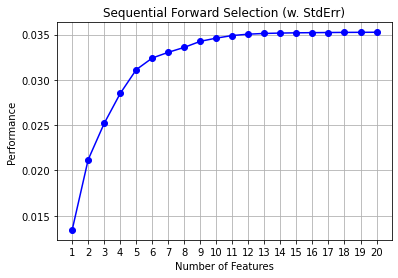

In [34]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [18]:
df_fs = df1[[*df_SFS_results['feature_names'][15]]]
df_fs['Pdisc'] = df1['Pdisc']

# Addestramento Modelli

In [19]:
count_class_0, count_class_1 = df_fs.Pdisc.value_counts()
df_class_0 = df_fs[df_fs['Pdisc'] == 0]
df_class_1 = df_fs[df_fs['Pdisc'] == 1]
count_class_0, count_class_1

(320626, 9946)

La classe è sbilanciata, i valori 1 sono solo il 3% del dataset.
Provando ad addestrare un modello utilizzando solamente la tecnica di campionamento stratificato si ottengono risultati scadenti

## Primo approccio: RANDOM UNDERSAMPLING

### Neural Network

In [20]:
# Early Stopping (evita overfitting)
custom_early_stopping = EarlyStopping(
    monitor='accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

In [38]:
folds = StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)#istanzio il k fold stratificato per ovviare l'overfitting

X = df_fs.drop('Pdisc', axis = 'columns')
y = df_fs['Pdisc']

contatore = 0

for train_index, test_index in folds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    df_train = X_train
    df_train['Pdisc'] = y_train
    count_class_0, count_class_1 = df_train.Pdisc.value_counts()
    df_class_0 = df_train[df_train['Pdisc'] == 0]
    df_class_1 = df_train[df_train['Pdisc'] == 1]
    df_class_0_under = df_class_0.sample(count_class_1)
    df_train_under = pd.concat([df_class_0_under, df_class_1], axis = 0)
    df_train_under.shape
    X_train = df_train_under.drop('Pdisc', axis = 'columns')
    y_train = df_train_under['Pdisc']
    
    model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(15,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'), 
    ])

    model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy', tf.metrics.Precision(), tf.metrics.Recall(), tf.metrics.AUC()])
    model.fit(X_train, y_train, epochs=100, callbacks = [custom_early_stopping], verbose = 0, class_weight={0:0.8, 1:0.2})
    y_proba = model.predict(X_test)
    y_preds = np.round(y_proba)
    contatore = contatore + 1
    metrics = model.evaluate(X_test, y_test)
    print('Report modello ', contatore, ':\n', classification_report(y_test, y_preds))

1034/1034 [==============================] - 1s 1ms/step - loss: 0.2215 - accuracy: 0.9410 - precision_22: 0.2014 - recall_22: 0.3236 - auc_22: 0.7461
Report modello  1 :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     32063
           1       0.20      0.32      0.25       995

    accuracy                           0.94     33058
   macro avg       0.59      0.64      0.61     33058
weighted avg       0.96      0.94      0.95     33058

1034/1034 [==============================] - 1s 837us/step - loss: 0.2186 - accuracy: 0.9469 - precision_23: 0.2379 - recall_23: 0.3467 - auc_23: 0.7652
Report modello  2 :
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     32063
           1       0.24      0.35      0.28       995

    accuracy                           0.95     33058
   macro avg       0.61      0.66      0.63     33058
weighted avg       0.96      0.95      0.95     33058



## Random Forest

In [22]:
folds = StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)

contatore = 0

X = df_fs.drop('Pdisc', axis = 'columns')
y = df_fs['Pdisc']

for train_index, test_index in folds.split(X, y):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    df_train = X_train
    df_train['Pdisc'] = y_train
    count_class_0, count_class_1 = df_train.Pdisc.value_counts()
    df_class_0 = df_train[df_train['Pdisc'] == 0]
    df_class_1 = df_train[df_train['Pdisc'] == 1]
    df_class_0_under = df_class_0.sample(count_class_1)
    df_train_under = pd.concat([df_class_0_under, df_class_1], axis = 0)
    df_train_under.shape
    X_train = df_train_under.drop('Pdisc', axis = 'columns')
    y_train = df_train_under['Pdisc']
    
    model = RandomForestClassifier(n_estimators = 100, max_depth = 20, n_jobs=-1, random_state = 0, class_weight={0:0.8, 1:0.2})
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    contatore = contatore + 1
    print('Report modello ', contatore, ':\n', classification_report(y_test, predictions))
    print('AUC:', roc_auc_score(y_test, pd.DataFrame(model.predict_proba(X_test))[1].to_list()), '\n\n')


Report modello  1 :
               precision    recall  f1-score   support

           0       0.98      0.84      0.90     32063
           1       0.08      0.46      0.14       995

    accuracy                           0.83     33058
   macro avg       0.53      0.65      0.52     33058
weighted avg       0.95      0.83      0.88     33058

AUC: 0.7006656963199179 


Report modello  2 :
               precision    recall  f1-score   support

           0       0.98      0.83      0.90     32063
           1       0.09      0.54      0.16       995

    accuracy                           0.83     33058
   macro avg       0.54      0.69      0.53     33058
weighted avg       0.96      0.83      0.88     33058

AUC: 0.7341906958614925 


Report modello  3 :
               precision    recall  f1-score   support

           0       0.98      0.83      0.90     32063
           1       0.08      0.48      0.14       994

    accuracy                           0.82     33057
   macro av

## Secondo approccio: RANDOM OVERSAMPLING

## Neural Network

In [24]:
folds = StratifiedKFold(n_splits = 5, random_state = 0, shuffle=True)#istanzio il k fold stratificato per ovviare l'overfitting

contatore = 0

best_nn_over = 0
best_f1 = 0
best_X_nn_over = 0
best_y_nn_over = 0

X = df_fs.drop('Pdisc', axis = 'columns')
y = df_fs['Pdisc']

for train_index, test_index in folds.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    df_train = X_train
    df_train['Pdisc'] = y_train
    count_class_0, count_class_1 = df_train.Pdisc.value_counts()
    df_class_0 = df_train[df_train['Pdisc'] == 0]
    df_class_1 = df_train[df_train['Pdisc'] == 1]
    df_class_1_over = df_class_1.sample(count_class_0, replace = True)
    df_train_over = pd.concat([df_train, df_class_1_over], axis = 0)
    X_train = df_train_over.drop('Pdisc', axis = 'columns')
    y_train = df_train_over['Pdisc']
    
    model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(15,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'), 
    ])

    model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy', tf.metrics.Precision(), tf.metrics.Recall(), tf.metrics.AUC()])
    model.fit(X_train, y_train, epochs=100, callbacks = [custom_early_stopping], verbose = 0, class_weight={0:0.8, 1:0.2})
    y_proba = model.predict(X_test)
    y_preds = np.round(y_proba)
    contatore = contatore + 1
    metrics = model.evaluate(X_test, y_test)
    print('Report modello ', contatore, ':\n', classification_report(y_test, y_preds))
    if f1_score(y_test, y_preds) > best_f1 :
        best_nn_over = model
        best_X_nn_over = X_test
        best_y_nn_over = y_test

2067/2067 [==============================] - 2s 936us/step - loss: 0.2106 - accuracy: 0.9509 - precision_12: 0.2426 - recall_12: 0.2981 - auc_12: 0.7539
Report modello  1 :
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     64126
           1       0.24      0.30      0.27      1989

    accuracy                           0.95     66115
   macro avg       0.61      0.63      0.62     66115
weighted avg       0.96      0.95      0.95     66115

2067/2067 [==============================] - 4s 2ms/step - loss: 0.2273 - accuracy: 0.9420 - precision_13: 0.2137 - recall_13: 0.3462 - auc_13: 0.7494
Report modello  2 :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     64125
           1       0.21      0.35      0.26      1990

    accuracy                           0.94     66115
   macro avg       0.60      0.65      0.62     66115
weighted avg       0.96      0.94      0.95     66115



## Random Forest

In [25]:
folds = StratifiedKFold(n_splits = 5, random_state = 0, shuffle=True)#istanzio il k fold stratificato per ovviare l'overfitting

contatore = 0

best_rf_over = 0
best_f1 = 0
best_X_rf_over = 0
best_y_rf_over = 0

X = df_fs.drop('Pdisc', axis = 'columns')
y = df_fs['Pdisc']

for train_index, test_index in folds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    df_train = X_train
    df_train['Pdisc'] = y_train
    count_class_0, count_class_1 = df_train.Pdisc.value_counts()
    df_class_0 = df_train[df_train['Pdisc'] == 0]
    df_class_1 = df_train[df_train['Pdisc'] == 1]
    df_class_1_over = df_class_1.sample(count_class_0 - count_class_1, replace = True)
    df_train_over = pd.concat([df_train, df_class_1_over], axis = 0)
    X_train = df_train_over.drop('Pdisc', axis = 'columns')
    y_train = df_train_over['Pdisc']
    
    model = RandomForestClassifier(n_estimators = 72,max_depth = 20, n_jobs=-1, random_state = 0, class_weight={0:0.8, 1:0.2})#istanzio il modello 
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    contatore = contatore + 1
    if f1_score(y_test, predictions) > best_f1 :
        best_rf_over = model
        best_X_rf_over = X_test
        best_y_rf_over = y_test
    print('Report modello ', contatore, ':\n', classification_report(y_test, predictions))
    print('AUC:', roc_auc_score(y_test, pd.DataFrame(model.predict_proba(X_test))[1].to_list()), '\n\n')

Report modello  1 :
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     64126
           1       0.22      0.25      0.24      1989

    accuracy                           0.95     66115
   macro avg       0.60      0.61      0.61     66115
weighted avg       0.95      0.95      0.95     66115

AUC: 0.693720336629242 


Report modello  2 :
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     64125
           1       0.22      0.26      0.24      1990

    accuracy                           0.95     66115
   macro avg       0.60      0.62      0.61     66115
weighted avg       0.95      0.95      0.95     66115

AUC: 0.6970605189691146 


Report modello  3 :
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     64125
           1       0.22      0.25      0.23      1989

    accuracy                           0.95     66114
   macro avg

## Terzo approccio: SMOTE

## Neural Network

In [35]:
folds = StratifiedKFold(n_splits = 5, random_state = 0, shuffle=True)#istanzio il k fold stratificato per ovviare l'overfitting

contatore = 0

X = df_fs.drop('Pdisc', axis = 'columns')
y = df_fs['Pdisc']

best_nn_smote = 0
best_f1 = 0
best_X_nn_smote = 0
best_y_nn_smote = 0

for train_index, test_index in folds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    smote = SMOTE(sampling_strategy='minority')
    X_train, y_train = smote.fit_resample(X_train,y_train)
    
    model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(15,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy', tf.metrics.Precision(), tf.metrics.Recall(), tf.metrics.AUC()])
    model.fit(X_train, y_train, epochs=100, callbacks = [custom_early_stopping], verbose = 0, class_weight = {0:0.8, 1:0.2})
    y_proba = model.predict(X_test)
    y_preds = np.round(y_proba)
    contatore = contatore + 1
    metrics = model.evaluate(X_test, y_test)
    print('Report modello ', contatore, ':\n', classification_report(y_test, y_preds))
    if f1_score(y_test, y_preds) > best_f1 :
        best_nn_smote = model
        best_X_nn_smote = X_test
        best_y_nn_smote = y_test

2067/2067 [==============================] - 2s 910us/step - loss: 0.2015 - accuracy: 0.9458 - precision_17: 0.2218 - recall_17: 0.3198 - auc_17: 0.7255
Report modello  1 :
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     64126
           1       0.22      0.32      0.26      1989

    accuracy                           0.95     66115
   macro avg       0.60      0.64      0.62     66115
weighted avg       0.96      0.95      0.95     66115

2067/2067 [==============================] - 2s 917us/step - loss: 0.1951 - accuracy: 0.9470 - precision_18: 0.2205 - recall_18: 0.3005 - auc_18: 0.7261
Report modello  2 :
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     64125
           1       0.22      0.30      0.25      1990

    accuracy                           0.95     66115
   macro avg       0.60      0.63      0.61     66115
weighted avg       0.96      0.95      0.95     66115

## Random Forest

In [37]:
folds = StratifiedKFold(n_splits = 5, random_state = 0, shuffle=True)

contatore = 0

X = df_fs.drop('Pdisc', axis = 'columns')
y = df_fs['Pdisc']

best_rf_smote = 0
best_f1 = 0
best_X_rf_smote = 0
best_y_rf_smote = 0

for train_index, test_index in folds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    smote = SMOTE(sampling_strategy='minority')
    X_train, y_train = smote.fit_resample(X_train,y_train)
    
    model = RandomForestClassifier(n_estimators = 72,max_depth = 20, n_jobs=-1, random_state = 0, class_weight = {0:0.8, 1:0.2}) 
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    contatore = contatore + 1
    print('Report modello ', contatore, ':\n', classification_report(y_test, predictions))
    print('AUC:', roc_auc_score(y_test, pd.DataFrame(model.predict_proba(X_test))[1].to_list()), '\n\n')

Report modello  1 :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     64126
           1       0.18      0.30      0.22      1989

    accuracy                           0.94     66115
   macro avg       0.58      0.63      0.59     66115
weighted avg       0.95      0.94      0.94     66115

AUC: 0.694378652811591 


Report modello  2 :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     64125
           1       0.18      0.29      0.22      1990

    accuracy                           0.94     66115
   macro avg       0.58      0.63      0.59     66115
weighted avg       0.95      0.94      0.94     66115

AUC: 0.6972726948583072 


Report modello  3 :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     64125
           1       0.18      0.29      0.22      1989

    accuracy                           0.94     66114
   macro avg

# Propensity

In [39]:
NN = best_nn_over

probability = NN.predict(best_X_nn_over)
predictions = np.round(probability)

print('Report modello :\n', classification_report(best_y_nn_over, predictions))

2067/2067 [==============================] - 1s 601us/step
Report modello :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     64125
           1       0.21      0.34      0.26      1989

    accuracy                           0.94     66114
   macro avg       0.59      0.65      0.61     66114
weighted avg       0.96      0.94      0.95     66114



Non c'è il seed permanente, quindi ogni volta che si fa k-fold vengono generati 10 train diversi (prima il train numero 8 portava a 0.96 di F-Measure e invece ora è 0.94).

Addestro comunque il modello per fare dei test

In [99]:
df = pd.DataFrame(best_y_nn_over)

In [100]:
count_class_0, count_class_1 = df.Pdisc.value_counts()
df_class_0 = df[df['Pdisc'] == 0]
df_class_1 = df[df['Pdisc'] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis = 0)
df_under.shape

(3978, 1)

In [101]:
index = df.index
probability = pd.DataFrame(probability)
probability['index'] = index

In [102]:
probability

,0,index
0,0.365631,187151
1,0.209308,187165
2,0.057322,187179
3,0.081120,187139
4,0.093263,187096
...,...,...
66109,0.589344,222979
66110,0.595141,280016
66111,0.132924,71686
66112,0.284636,26982


In [103]:
df_under

,Pdisc
102254,0
222880,0
134117,0
22402,0
298085,0
...,...
279746,1
131343,1
213200,1
218698,1


In [104]:
df = df_under.merge(probability, how='inner', left_index=True, right_on='index')

In [105]:
df = df.drop('index', axis='columns')

In [106]:
df.columns = ['Pdisc', 'Propensity']

In [107]:
df = df.sort_values(by='Propensity', ascending=False)

In [108]:
row_decile = []
contatore = 0
for i in range(0,10):
    row_decile.append(df.shape[0] // 10 * i)

In [109]:
row_decile

[0, 397, 794, 1191, 1588, 1985, 2382, 2779, 3176, 3573]

In [110]:
df_decili = {'100%': df[row_decile[0]:row_decile[1]], '90%': df[row_decile[1]+1:row_decile[2]], 
             '80%': df[row_decile[2]+1:row_decile[3]], '70%': df[row_decile[3]+1:row_decile[4]], 
             '60%': df[row_decile[4]+1:row_decile[5]], '50%': df[row_decile[5]+1:row_decile[6]], 
             '40%': df[row_decile[6]+1:row_decile[7]], '30%': df[row_decile[7]+1:row_decile[8]], 
             '20%': df[row_decile[8]+1:row_decile[9]], '10%': df[row_decile[9]:]}

In [115]:
for dec in df_decili:
    print('Decile', dec, ': \n')
    print('Propensity to churn minimo:', round(min(df_decili[dec]['Propensity'] * 100), 2))
    print('Propensity to churn massimo:', round(max(df_decili[dec]['Propensity'] * 100), 2), '\n')
    perc_0 = 0
    perc_1 = 0
    try:
        perc_1 = df_decili[dec]['Pdisc'].value_counts()[1]/len(df_decili[dec]['Pdisc']) * 100
    except:
        perc_1 = 0
    try:
        perc_0 = df_decili[dec]['Pdisc'].value_counts()[0]/len(df_decili[dec]['Pdisc']) * 100
    except:
        perc_0 = 0
    
    print('Percentuale di churners:', round(perc_1, 2))
    print('Percentuale di non churners:', round(perc_0, 2))
    print('\n------------------------------------------------\n')

Decile 100% : 

Propensity to churn minimo: 76.96
Propensity to churn massimo: 96.12 

Percentuale di churners: 92.44
Percentuale di non churners: 7.56

------------------------------------------------

Decile 90% : 

Propensity to churn minimo: 47.55
Propensity to churn massimo: 76.96 

Percentuale di churners: 83.33
Percentuale di non churners: 16.67

------------------------------------------------

Decile 80% : 

Propensity to churn minimo: 27.91
Propensity to churn massimo: 47.53 

Percentuale di churners: 64.65
Percentuale di non churners: 35.35

------------------------------------------------

Decile 70% : 

Propensity to churn minimo: 21.55
Propensity to churn massimo: 27.87 

Percentuale di churners: 56.06
Percentuale di non churners: 43.94

------------------------------------------------

Decile 60% : 

Propensity to churn minimo: 16.93
Propensity to churn massimo: 21.46 

Percentuale di churners: 47.98
Percentuale di non churners: 52.02

-----------------------------------